In [1]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!apt-get -qq install -y libfluidsynth1

In [6]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing The Required Libraries

In [41]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt


# **Load** **Data**

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# **Analyzing The** **Data**

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

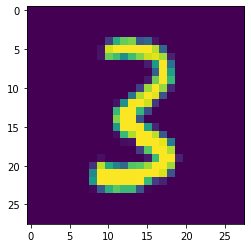

In [14]:
plt.imshow(x_train[50000])     #ploting the index=image

In [15]:
np.argmax(y_train[5000])

0

# **Reshaping Datase**t 

In [16]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

## **Applying** **One** **Hot** **Encoding**

In [17]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

# **Model** **Building**

In [18]:
model = Sequential()

# **Add** **CNN** **Layers**

In [19]:
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation ='softmax'))

# **Compiling** **the** **Model**

In [20]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

# **Train** **the** **Model**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [22]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.2007 - accuracy: 0.9543 - val_loss: 0.0910 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.0720 - val_accuracy: 0.9791
Epoch 3/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.0879 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0943 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0984 - val_accuracy: 0.9784


# **OBSERVING** **THE** **METRICS**

In [23]:
metrics=model.evaluate(x_test,y_test,verbose=0)


In [24]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)


Mertics(Test loss & Test Accuracy):
[0.09835714101791382, 0.9783999919891357]


# **Test** **the** **Model**

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [62]:
from keras.models import load_model
import matplotlib.pyplot as plt

# **Saving** **the** **Model**

In [63]:
model.save('models/mnistCNN.h5')

# **create** **the** **model**

In [46]:
model=Sequential()

In [47]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))

In [48]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(number_of_classes,activation="softmax"))

# **Train** **The** **Model**(**fitting** **the** **model**)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
img=Image.open('img_1.png')
plt.imshow(img)


In [ ]:
Epoch 1/5
1875/1875 [==============================] - 169s 89ms/step - loss: 0.2433 - accuracy: 0.9507 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0711 - accuracy: 0.9784 - val_loss: 0.0694 - val_accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.0947 - val_accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0946 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0907 - val_accuracy: 0.9793